# i. Perkenalan

Nama : Abraham Rashid Haikal

Batch : HCK 18

## 1. Latar Belakang

Kanker paru adalah salah satu penyakit mematikan di dunia. Deteksi dini kanker paru dapat meningkatkan peluang keberhasilan pengobatan. Penelitian ini bertujuan untuk membangun model pembelajaran mesin untuk memprediksi risiko kanker paru berdasarkan data pasien.

Data yang digunakan dalam penelitian ini mencakup informasi demografi (jenis kelamin, usia), perilaku (merokok, konsumsi alkohol, tekanan teman sebaya), gejala (jari kuning, kecemasan, kelelahan, alergi, mengi, batuk, sesak napas, kesulitan menelan, nyeri dada), riwayat medis (penyakit kronis), dan status kanker paru (ada atau tidak).

Model pembelajaran mesin yang akan dikembangkan diharapkan dapat membantu dalam skrining awal risiko kanker paru, sehingga langkah-langkah pencegahan atau pengobatan dapat dilakukan lebih dini.

## 2. Kerangka Kerja Smart

S: Identifikasi dini pasien beresiko kanker paru

M: Model dapat menangkap pasien beresiko kanker paru dengan nilai recall 80%

A: Membangun model klasifikasi pasien beresiko kanker paru

R: Mengidentifikasi pasien beresiko dari gejala yang berhubungan dengan prediksi model

T: Model dapat digunakan dalam 3 bulan kedepan

Problem Statement: Membuat model klasifikasi pasien beresiko kanker paru dengan nilai recall 80% untuk identifikasi dini pasien dari gejala yang berhubungan dalam waktu 3 bulan.

## 3. Penjabaran Masalah

1. Bagaimana perbandingan pasien dengan gejala yang dicurigai berhubungan dengan kanker paru?
2. Algoritma apa yang paling optimal untuk mengklasifikasi pasien dengan kanker paru dari gejala yang ada?
3. Apa hyperparameter yang dapat menghasilkan performa paling optimal untuk model yang digunakan?
4. Bagaimana performa model dalam memprediksi klasifikasi pasien beresiko kanker paru?

# ii. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from scipy.stats import kendalltau, chi2_contingency
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pickle

# iii. Loading Data

In [2]:
# Mengimport dataframe dari csv
df = pd.read_csv('dataseter.csv')

In [3]:
# Menampilkan gambaran umum dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   object
 3   YELLOW_FINGERS         3000 non-null   object
 4   ANXIETY                3000 non-null   object
 5   PEER_PRESSURE          3000 non-null   object
 6   CHRONIC_DISEASE        3000 non-null   object
 7   FATIGUE                3000 non-null   object
 8   ALLERGY                3000 non-null   object
 9   WHEEZING               3000 non-null   object
 10  ALCOHOL_CONSUMING      3000 non-null   object
 11  COUGHING               3000 non-null   object
 12  SHORTNESS_OF_BREATH    3000 non-null   object
 13  SWALLOWING_DIFFICULTY  3000 non-null   object
 14  CHEST_PAIN             3000 non-null   object
 15  LUNG_CANCER          

In [4]:
# Menampilkan 5 data teratas dari dataframe
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Yes,NO
1,F,55,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,NO
2,F,78,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,YES
3,M,60,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,YES
4,F,80,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,NO


Data terdiri dari 16 kolom dan 3000 baris dengan tipe data object dengan nilai YES atau NO yang menunjukkan kondisi gejala yang dialami oleh pasien.

# iv. EDA

## 1. Analisis Missing Value

In [5]:
# Menghitung jumlah missing value pada dataframe
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

Tidak ada missing value dalam dataframe.

## 2. Analisis Data Duplikat

In [6]:
# Menghitung jumlah data duplikat
df.duplicated().sum()

np.int64(2)

Terdapat 2 data duplikat dalam dataframe. Data duplikat akan ditangani dengan `drop_duplicates()` untuk menjaga 1 data dari data duplikat dan menghapus data lain yang merupakan data duplikat agar tidak ada data yang terduplikasi.

In [7]:
# Menghapus data duplikat
df_nodupe = df.drop_duplicates()

## 3. Perbandingan pasien dengan gejala yang ditunjukkan dengan kanker paru.

In [8]:
# membuat dataframe baru berisikan data pasien dengan kanker paru
df_cancer = df_nodupe[df_nodupe['LUNG_CANCER'] == 'YES']

In [9]:
df_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
2,F,78,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,YES
3,M,60,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,YES
5,F,58,Yes,Yes,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,YES
6,F,70,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Yes,YES
11,F,60,No,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Yes,YES


In [21]:
# Membuat list kolom gejala untuk visualisasi
list_eda = [col for col in df_cancer.columns if col not in ['AGE', 'LUNG_CANCER']]

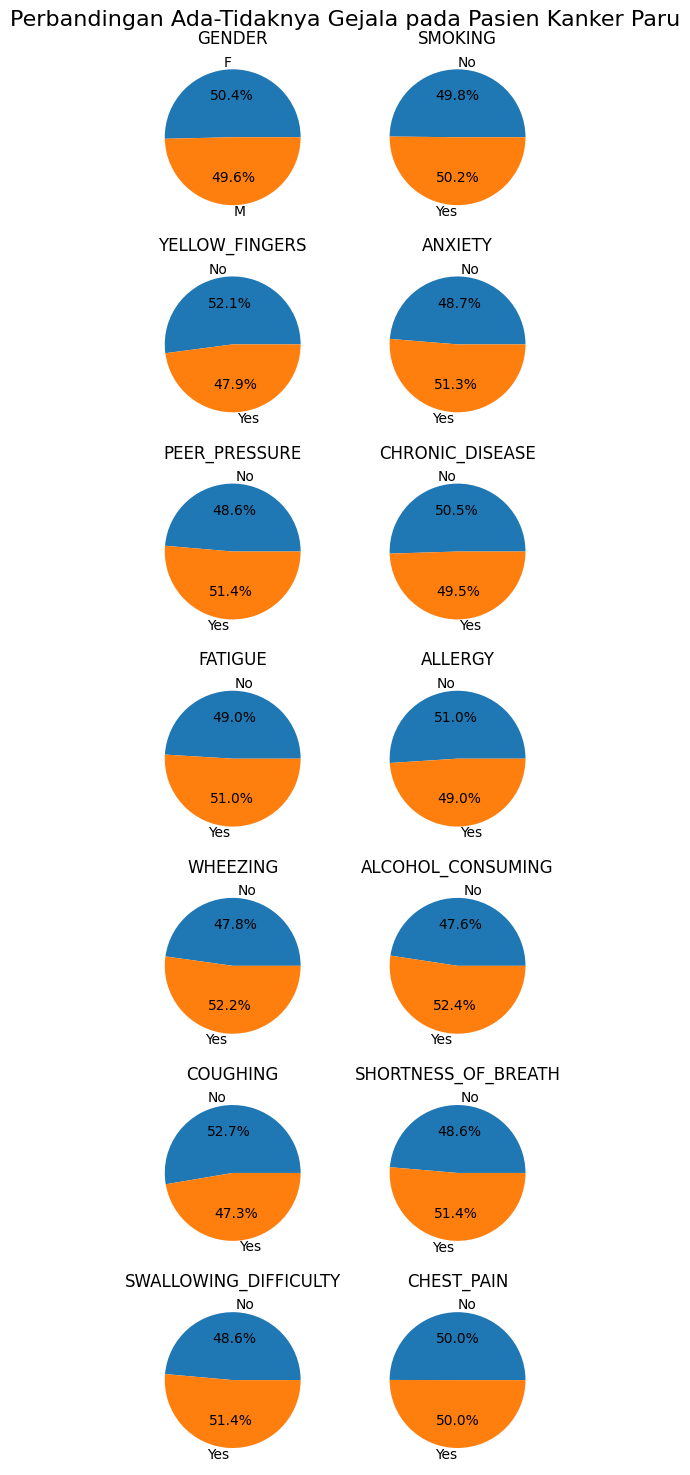

In [48]:
# Membuat subplot
fig, axes = plt.subplots(7, 2, figsize=(5, 15))

# Flatten untuk indexing
axes = axes.flatten()

fig.suptitle('Perbandingan Ada-Tidaknya Gejala pada Pasien Kanker Paru',fontsize=16)
# Membuat looping untuk 
for ax, col in zip(axes, list_eda):
    df_value_counts = df_cancer[col].value_counts().sort_index()
    
    # Create the pie chart in the appropriate axis
    ax.pie(df_value_counts.values, labels=df_value_counts.index, autopct='%1.1f%%')
    ax.set_title(col)

# Menampilkan plot
plt.tight_layout()
plt.show()

Pie chart menunjukkan bahwa proporsi pasien yang menunjukkan gejala dengan yang tidak menunjukkan gejala adalah seimbang diantara seluruh pasien yang positif kanker paru.

## 4. Kardinalitas

In [8]:
# Membuat fungsi cek kardinalitas
def cardinality_func(df):

    # Mengatur agar jumlah kolom yang ditampilkan tidak dibatasi
    pd.set_option('display.max_colwidth', None)

    # Mengatur agar jumlah baris yang ditampilkan tidak dibatasi
    pd.set_option('display.max_rows', None)

    # Membuat wadah untuk menyimpan nilai kolom, jumlah nilai unik, dan daftar nilai kolom tersebut
    columns =[]
    nuniques =[]
    uniques = []

    # Membuat looping untuk setiap kolom pada string_columns
    for column in df.columns:
        columns.append(column) # Menambah nama kolom ke wadah
        nuniques.append(df[column].nunique()) # Menambah jumlah nilai unik ke wadah
        uniques.append(df[column].unique()) # Menambah daftar nilai unik ke wadah

    # Membuat dataframe dari wadah yang sudah diisi oleh loop
    card_df = pd.DataFrame()
    card_df['Nama Kolom']=columns
    card_df['Kardinalitas']=nuniques
    card_df['Nilai Unik']=uniques
    
    return card_df

In [9]:
# Melakukan cek kardinalitas pada dataframe
cardinality_func(df_nodupe)

,Nama Kolom,Kardinalitas,Nilai Unik
0,GENDER,2,"[M, F]"
1,AGE,51,"[65, 55, 78, 60, 80, 58, 70, 74, 77, 67, 35, 79, 39, 62, 64, 66, 76, 48, 33, 47, 50, 36, 37, 51, 53, 72, 71, 54, 41, 46, 59, 32, 34, 44, 38, 69, 45, 40, 63, 75, 52, 31, 57, 73, 42, 56, 68, 61, 30, 49, 43]"
2,SMOKING,2,"[Yes, No]"
3,YELLOW_FINGERS,2,"[Yes, No]"
4,ANXIETY,2,"[Yes, No]"
5,PEER_PRESSURE,2,"[No, Yes]"
6,CHRONIC_DISEASE,2,"[No, Yes]"
7,FATIGUE,2,"[Yes, No]"
8,ALLERGY,2,"[No, Yes]"
9,WHEEZING,2,"[No, Yes]"


Berdasarkan hasil uji kardinalitas, seluruh kolom pada dataframe kecuali kolom `AGE` adalah fitur kategorikal yang bersifat biner dengan 2 nilai yaitu Yes dan No sebagai indikasi gejala yang dimiliki pasien. Kolom target bersifat sama dengan kolom fitur lain dengan nilai YES dan NO mengindikasikan apakah pasien memiliki kanker paru atau tidak. Berdasarkan temuan diatas, list kolom numerik dan kategorikal dapat didefinisikan.

In [10]:
# Kolom numerik
continuous_cols = ['AGE']

# Kolom kategorikal
nominal_col = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']

# v. Feature Engineering

## 1. Label Encoding Kolom Target

Untuk mempermudah proses, kolom target yang bernilai YES dan NO diubah menjadi 1 dan 0 dengan label encoder.

In [11]:
# Menggunakan Label Encoder untuk mengubah nilai pada target
label_enc = LabelEncoder()
df_nodupe['LUNG_CANCER'] = label_enc.fit_transform(df_nodupe['LUNG_CANCER'])

C:\Users\haika\AppData\Local\Temp\ipykernel_22216\2089755941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodupe['LUNG_CANCER'] = label_enc.fit_transform(df_nodupe['LUNG_CANCER'])


In [12]:
df_nodupe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,Yes,0
1,F,55,Yes,No,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,No,0
2,F,78,No,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,1
3,M,60,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,1
4,F,80,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No,0


Nilai pada kolom target sudah diganti dengan 1 dan 0.

## 2. Split Data

### a. Memisahkan Data Inference dari Dataframe

Data inference adalah data yang digunakan untuk pengujian model setelah model dibuat, oleh karena itu data inference tidak boleh ada dalam train set sehingga dilakukan ekstraksi dengan metode sample dan menghapus data tersebut dari dataframe.

In [13]:
# Membuat dataframe inference dari mensampel 5 data dari dataframe
data_inf = df_nodupe.sample(5, random_state=5697)

# Menghapus data inference dari dataframe
df_nodupe.drop(data_inf.index, inplace=True)

# reset index
df_nodupe.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Menghapus target dari data inference
data_inf.drop(['LUNG_CANCER'], axis=1, inplace=True)

C:\Users\haika\AppData\Local\Temp\ipykernel_22216\9606721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodupe.drop(data_inf.index, inplace=True)


### b. Split Train & Test Set

In [14]:
# Menentukan fitur dan target
X = df_nodupe.drop(columns=['LUNG_CANCER'], axis=1)
y = df_nodupe['LUNG_CANCER']

# Splitting data menjadi data test dan train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5697)

# cek ukuran test dan train
print(f'Train set : {X_train.shape}')
print(f'test set : {X_test.shape}')

Train set : (2394, 15)
test set : (599, 15)


## 3. Outlier Handling

In [15]:
# membuat fungsi untuk mengecek outlier
def outlier_analysis(data):

    # Membuat wadah untuk penyimpanan hasil analisis
    result = pd.DataFrame() #membuat dataframe untuk hasil analisis
    col_name = [] # wadah nama kolom
    skew = [] # wadah skewness
    upper = [] # wadah batas atas
    lower = [] # wadah batas bawah
    has_outliers = []  # wadah indikasi keberadaan outlier

    # Looping untuk setiap kolom pada dataframe input
    for col in data.columns:
        col_name.append(col)

        # Menghitung skewness kolom
        skew_val = data[col].skew()
        skew.append(skew_val)

        # Membuat kondisi untuk menentukan perhitungan batas atas dan bawah
        if skew_val > 1 or skew_val < -1: # untuk data dengan extreme skewness
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)

        elif skew_val >= 0.5 or skew_val <= -0.5: #untuk data dengan moderate skewness
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)

        else: # untuk data dengan distribusi normal
            std = data[col].std()

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
        
        # Menambahkan batas atas dan bawah ke wadah
        upper.append(upper_boundary)
        lower.append(lower_boundary)
        
        # Menentukan indikasi keberadaan outlier
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))

    # menambahkan wadah ke dalam dataframe hasil
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has_outliers'] = has_outliers 
    return result

In [16]:
# Memasukkan kolom numerik ke list 
outlier_check = X_train[['AGE']]

# Pengecekan outlier
outlier_df = outlier_analysis(outlier_check)
outlier_df

,columns,skewness,upper boundary,lower boundary,has_outliers
0,AGE,0.009172,99.314452,10.835924,False


In [19]:
# Cek skewness dari kolom AGE
X_train['AGE'].skew()

np.float64(0.009172164662669489)

Kolom `AGE` memiliki nilai skewness sebesar 0.009. Nilai skewness yang lebih kecil dari 0.5 menunjukkan bahwa kolom `AGE` terdistribusi secara normal.

Dari analisis outlier, data train tidak memiliki outlier pada kolom numeriknya.

## 4. Feature Selection

### a. Korelasi Kolom Kategorikal

Korelasi kolom kategorikal menggunakan perhitungan chi-squared.

In [17]:
# mengatur level signifikansi (alpha)
alpha2 = 0.05

# Membuat dataframe nilai korelasi chi-square tiap kolom
correlation_df_nominal = pd.DataFrame(columns=['nominal_column', 'chi2-statistic', 'p-value', 'is_correlated'])

# Membuat looping untuk uji korelasi pada tiap kolom
for cat_column in nominal_col:
    contingency_table = pd.crosstab(X_train[cat_column], y_train)

    # Mendefinisikan nilai chi-square dan p
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Mendefinisikan indikasi korelasi kolom denga target
    is_correlated = 'Yes' if p < alpha2 else 'No'
    
    # Concat nama kolom dengan nilai chi-square dan p serta indikasi korelasinya pada dataframe correlation_df_nominal
    correlation_df_nominal = pd.concat([
        correlation_df_nominal,
        pd.DataFrame({'nominal_column': [cat_column], 'chi2-statistic': [chi2], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Menampilkan hasil uji korelasi
correlation_df_nominal

C:\Users\haika\AppData\Local\Temp\ipykernel_22216\1283412578.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_df_nominal = pd.concat([


,nominal_column,chi2-statistic,p-value,is_correlated
0,GENDER,0.028238,0.866550,No
1,SMOKING,0.029776,0.863000,No
2,YELLOW_FINGERS,0.015894,0.899675,No
3,ANXIETY,0.902747,0.342046,No
4,PEER_PRESSURE,1.223446,0.268685,No
5,CHRONIC_DISEASE,0.139287,0.708991,No
6,FATIGUE,0.001269,0.971582,No
7,ALLERGY,0.022507,0.880746,No
8,WHEEZING,1.464486,0.226218,No
9,ALCOHOL_CONSUMING,2.381265,0.122798,No


Berdasarkan perhitungan korelasi kolom kategorikal, hanya gejala batuk (COUGHING) yang berhubungan dengan target.

### b. Korelasi Kolom Numerik

In [18]:
# mengatur level signifikansi (alpha)
alpha = 0.1

# Membuat dataframe nilai korelasi spearman tiap kolom
correlation_df_num = pd.DataFrame(columns=['numerical column', 'correlation-statistic', 'is_correlated'])

# Membuat looping untuk uji korelasi pada tiap kolom
for cont_column in continuous_cols:
    
    # Mendefinisikan nilai korelasi dan p
    corr, p = kendalltau(X_train[cont_column], y_train)
    
    # Mendefinisikan indikasi korelasi kolom
    is_correlated = 'Yes' if abs(corr) > alpha else 'No'
    
    # Concat nama kolom dengan nilai korelasi dan p serta indikasi korelasinya pada dataframe correlation_df_num
    correlation_df_num = pd.concat([
        correlation_df_num,
        pd.DataFrame({'numerical column': [cont_column], 'correlation-statistic': [corr], 'p value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Menunjukkan hasil uji korelasi
correlation_df_num

C:\Users\haika\AppData\Local\Temp\ipykernel_22216\2625998189.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_df_num = pd.concat([


,numerical column,correlation-statistic,is_correlated,p value
0,AGE,-0.029512,No,0.079994


Berdasarkan uji korelasi kolom numerik, umur memiliki korelasi negatif yang sangat kecil terhadap target. Nilai p value pun hanya bisa menyimpulkan bahwa fitur umur berkorelasi dengan target dengan confidence 92% yang dibawah standar 95%

### c. Pemilihan
Berdasarkan uji korelasi, gejala-gejala yang ada secara statistik tidak memiliki pengaruh terhadap target. Namun secara medis gejala-gejala ini diperkirakan memiliki hubungan dengan kanker paru. Oleh karena itu, model dengan algoritma yang memiliki asumsi hubungan linear antara fitur dengan target tidak dapat digunakan. Model non-parametrik memiliki kelebihan dalam prediksi target yang tidak memiliki hubungan linear dengan target, oleh karena itu seluruh fitur akan digunakan untuk model prediksi dengan menggunakan algoritma yang non-parametrik seperti KNN, Decision Tree, SVM, dan Random Forest.

In [21]:
# Ordinal columns
cat_cols = nominal_col

# Numerical columns
num_cols = ['AGE']

# vi. Definisi Model

## 1. Pipeline Preprocessing

Membuat pipeline yang berisikan encoding dan scaling. Untuk kolom numerik, karena datanya terdistribusi dengan normal maka scaler yang digunakan adalah Standard Scaler. Untuk kolom kategorikal, karena nilai pada semua kolom bersifat biner, maka dapat di-encode dengan Ordinal Encoder.

In [27]:
# Membuat pipeline scaler
num_pipeline = make_pipeline(StandardScaler())

# Membuat Pipeline Encoder
cat_pipeline = make_pipeline(OrdinalEncoder())

# Membuat pipeline preprocessing
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_cols),
    ('pipe_cat', cat_pipeline, cat_cols)
])

In [28]:
preprocessing_pipeline

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['AGE']),
                                ('pipe_cat',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['GENDER', 'SMOKING', 'YELLOW_FINGERS',
                                  'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE',
                                  'FATIGUE', 'ALLERGY', 'WHEEZING',
                                  'ALCOHOL_CONSUMING', 'COUGHING',
                                  'SHORTNESS_OF_BREATH',
                                  'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'])])

## 2. Definisi Model
Model dasar yang digunakan adalah model KNN, Random Forest, SVM, Decision Tree, dan Adaboost. Seluruh model menggunakan hyperparameter default. Catatan untuk model Adaboost, secara default estimator yang digunakan adalah Decision Tree dengan max depth 1.

In [42]:
# K-Nearest Neighbors (KNN)
pipe_knn = Pipeline([
    ('transformer', preprocessing_pipeline),
    ('classifier', KNeighborsClassifier())
])
# Random Forest Classifier 
pipe_rf = Pipeline([
    ('transformer', preprocessing_pipeline),
    ('classifier', RandomForestClassifier())
])
# Support Vector Machine (SVM)
pipe_svc = Pipeline([
    ('transformer', preprocessing_pipeline),
    ('classifier', SVC())
])

# Random Forest Classifier
pipe_dt = Pipeline([
    ('transformer', preprocessing_pipeline),
    ('classifier', DecisionTreeClassifier())
])

pipe_ada = Pipeline([
    ('transformer', preprocessing_pipeline),
    ('classifier', AdaBoostClassifier(algorithm='SAMME'))
])

# vii. Model Training
Melakukan fitting setiap model dengan train set.

## 1. Model KNN

In [89]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AGE']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('classifier', KNeighborsClassifier())])

## 2. Model Random Forest

In [90]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AGE']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('classifier', RandomForestClassifier())])

## 3. Model SVM

In [91]:
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AGE']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('classifier', SVC())])

## 4. Model Decision Tree

In [92]:
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AGE']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('classifier', DecisionTreeClassifier())])

## 5. Model Adaboost

In [93]:
pipe_ada.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AGE']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN'])])),
                ('classifier', AdaBoostClassifier(algorithm='SAMME'))])

# viii. Evaluasi Model

Model dasar dievaluasi performanya dengan uji cross validation stratified K-fold. Scoring yang digunakan adalah metrik recall karena model yang dibuat diharapkan dapat meminimalisir kejadian false negatif dimana pasien yang beresiko kanker diprediksi sebagai pasien tanpa resiko kanker yang dapat berakibat fatal.

## 1. Evaluasi Model Dasar

In [94]:
# Mendefinisikan stratified K-fold dengan split 10
skfold=StratifiedKFold(n_splits=10)

# Menghitung nilai cross validation setiap model dengan scoring recall
cv_svm_model = cross_val_score(pipe_svc, X_train, y_train, cv=skfold, scoring="recall")
cv_dt_model = cross_val_score(pipe_dt, X_train, y_train, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(pipe_rf, X_train, y_train, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(pipe_knn, X_train, y_train, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(pipe_ada, X_train, y_train, cv=skfold, scoring="recall")

# Membuat wadah untuk hasil perhitungan cross validation
name_model = []
cv_scores=0

# Melakukan looping untuk menampilkan hasil perhitungan cross validation
for cv,name in zip([cv_svm_model, cv_dt_model, cv_rf_model, cv_knn_model, cv_ada_model],['svm_model', 'dt_model', 'rf_model', 'knn_model', 'ada_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)

    # Membuat conditional untuk mengambil model dengan nilai rata-rata cross validation tertinggi
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

svm_model
recall - All - Cross Validation  :  [0.58196721 0.45901639 0.54098361 0.50819672 0.49586777 0.50819672
 0.52459016 0.52459016 0.57377049 0.54918033]
recall - Mean - Cross Validation :  0.526635957187373
recall - Std - Cross Validation  :  0.03493534619486841
recall - Range of Test-Set       :  0.49170061099250456 - 0.5615713033822414
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.53278689 0.51639344 0.55737705 0.59016393 0.48760331 0.40163934
 0.5        0.48360656 0.54918033 0.45901639]
recall - Mean - Cross Validation :  0.5077767240211354
recall - Std - Cross Validation  :  0.05133830297681077
recall - Range of Test-Set       :  0.45643842104432464 - 0.5591150269979461
--------------------------------------------------
rf_model
recall - All - Cross Validation  :  [0.54918033 0.45901639 0.53278689 0.55737705 0.47933884 0.5
 0.51639344 0.53278689 0.50819672 0.50819672]
recall - Mean - Cross Validation :  0.5143273269204715


Berdasarkan hasil perhitungan cross validation, model dengan performa paling baik adalah model Adaboost dengan rata=rata nilai cross validation sebesar 0.56. Nilai standar deviasi dari model ini adalah 0.03 yang berarti dari 10 pengujian yang dilakukan nilai cross validasinya berdeviasi dari nilai rata-rata sebesar 0.003. Nilai ini menunjukkan bahwa model berperforma dengan cukup baik.

## 2. Hyperparameter Tuning
Dari hasil evaluasi model dasar, model Adaboost akan dilakukan hyperparameter tuning untuk meningkatkan performa model dasar. Hyperparameter tuning dilakukan dengan metode Grid Search untuk pencarian parameter secara menyeluruh.

In [113]:
# Mendefinisikan Hyperparameter untuk tuning
param_grid = {
    'classifier__n_estimators': [15, 20, 30],
    'classifier__learning_rate': [0.2, 0.3, 0.4],
    'classifier__algorithm': ['SAMME']
}

# Mendefinisikan Grid Search
grid_search = GridSearchCV(
    pipe_ada,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True),
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Menampilkan hasil cross validation dari grid search
print('--- Grid SearchCV Results ---')
print('Best cross-validation recall:', grid_search.best_score_)
print('Best parameters:', grid_search.best_params_)
print('Test set recall:', grid_search.score(X_test, y_test))

--- Grid SearchCV Results ---
Best cross-validation recall: 0.8065573770491803
Best parameters: {'classifier__algorithm': 'SAMME', 'classifier__learning_rate': 0.2, 'classifier__n_estimators': 15}
Test set recall: 0.6745762711864407


Hasil hyperparameter tuning menunjukkan bahwa nilai cross validation meningkat dari 0.56 menjadi 0.81. Nilai recall dari hyperparameter yang dihasilkan adalah 67 %.

## 3. Evaluasi Model

In [114]:
# Menyimpan model hasil hyperparameter tuning
best_param_ada = grid_search.best_estimator_

In [121]:
# Memprediksi train dan test set.
y_bestada_pred_train = best_param_ada.predict(X_train)
y_bestada_pred_test = best_param_ada.predict(X_test)

# Menampilkan hasil classification report dari model.
print('Train')
print(classification_report(y_train, y_bestada_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_bestada_pred_test))

Train
              precision    recall  f1-score   support

           0       0.55      0.38      0.45      1175
           1       0.54      0.70      0.61      1219

    accuracy                           0.54      2394
   macro avg       0.55      0.54      0.53      2394
weighted avg       0.55      0.54      0.53      2394


Test
              precision    recall  f1-score   support

           0       0.53      0.36      0.43       304
           1       0.51      0.67      0.58       295

    accuracy                           0.52       599
   macro avg       0.52      0.52      0.50       599
weighted avg       0.52      0.52      0.50       599



Confusion Matrix      : 


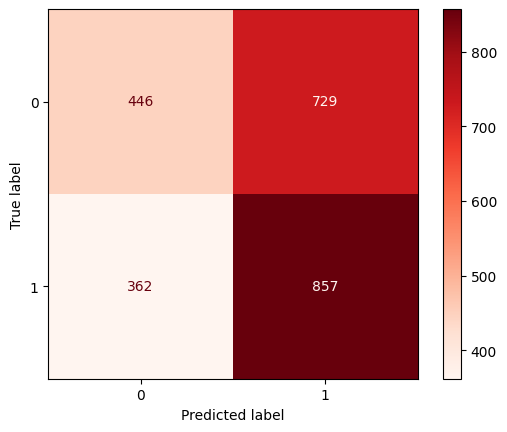

In [122]:
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_param_ada, X_train, y_train, cmap='Reds'))

Confusion Matrix      : 


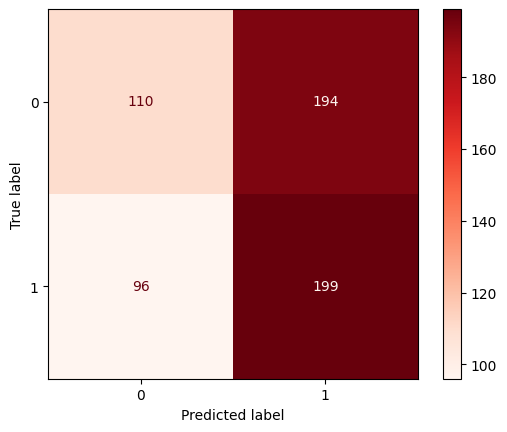

In [123]:
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_param_ada, X_test, y_test, cmap='Reds'))

Berdasarkan classification report dan confusion matrix diatas, model memiliki nilai recall sebesar 70%. Hal ini menunjukkan bahwa model dapat menangkap 70% dari kejadian positif kedalam prediksi. Metrik recall pada test set menunjukkan nilai sebesar 67%. Nilai test yang lebih kecil dari train mengindikasikan bahwa model mengalami overfitting dimana model terlalu menyesuaikan diri dengan train set sehingga ada kemungkinan misklasifikasi saat dihadapkan dengan data yang berbeda dari train set.

# ix. Model Saving

Model saving dilakukan dengan mengeksport pipeline model dengan menggunakan pickle.

In [119]:
with open('model.pkl', 'wb') as file_1:
    pickle.dump(best_param_ada, file_1)

# Model Inference
data inference yang sudah dipisahkan di bagian split data di eksport ke csv untuk kemudian diolah di notebook inference.

In [120]:
data_inf.to_csv('data_inf.csv')

# xii. Kesimpulan & Saran

## Kesimpulan
1. Pasien positif kanker paru berproporsi seimbang dalam menunjukkan ada atau tidaknya gejala-gejala yang berhubungan
2. Algoritma yang paling optimal untuk memprediksi kanker paru dari dataset ini adalah Adaboost
3. Hyperparameter yang paling optimal untuk model yang digunakan adalah dengan n estimator: 15, Learning rate: 0.2, dan algorithm: SAMME
4. Model dapat menangkap kelas positif dengan nilai recall sebesar 67%

## Saran
Untuk meningkatkan performa model, dapat dilakukan beberapa hal seperti
1. Diskusi dengan ahli untuk mendapatkan pemahaman data yang lebih dalam agar dapat menggabungkan fitur kategorika menjadi fitur baru yang lebih representatif.
2. Mencoba algoritma lain
3. Melakukan hyperparameter tuning yang lebih menyeluruh


# Conceptual Problem

## 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging!
Bagging adalah singkatan dari Bootstrap Aggregating yang merupakan sebuah teknik dalam machine learning yang bertujuan untuk meningkatkan kinerja model prediksi dengan cara menggabungkan beberapa model yang dibangun dari data pelatihan yang berbeda. Bagging bekerja dengan melakukan pengambilan sampel secara berulang dan mengembalikan sampel tersebut atau disebut juga bootstraping. Kemudian beberapa model dilatih dari data hasil bootstraping tersebut dan prediksi dari model-model tersebut digabung dengan pengambilan rata-rata untuk model regresi dan majority voting untuk klasifikasi.

## 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih!
Cara kerja algoritma Random Foret dengan Adaboost ada pada pembentukan dataset, pemilihan fitur, training, dan pembobotan. Dalam pembentukan dataset, Random Forest mengambil sampel dengan metode bootstraping, sedangkan Adaboost menggunakan dataset asli dengan pembobotan. Dalam pemilihan fitur, Random Forest memilih fitur secara acak sedangkan Adaboost menggunakan semua fitur. Dalam training, Random Forest membuat pohon-pohon decision tree secara paralel sedangkan Adaboost membangun pohon decision tree secara berurutan. Dalam pembobotan, Random Forest memberi bobot yang sama untuk semua pohon decision tree yang dibuat, sedangkan Adaboost memberi bobot lebih ke pohon yang memiliki akurasi lebih tinggi.

## 3. Jelaskan apa yang dimaksud dengan Cross Validation!
Cross Validation adalah teknik dalam machine learning yang digunakan untuk mengevaluasi kinerja suatu model secara lebih objektif dan akurat. Pertama data dibagi dalam menjadi beberapa bagian yang disebut fold, kemudian setiap fold akan di-train dengan fold lain sebagai test setnya secara bergantian dan diulang sebanyak jumlah foldnya. Lalu setiap pengulangan dinilai berdasarkan metrik yang ditentukan dan dihitung rata-rata dan standar deviasinya